In [1]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/cv_pred/cv5/'
learn_nuc = rdrive + 'scikit/nuc_conc/cv_pred/cv5/'

In [4]:
learn_path = rdrive + 'scikit/nuc_conc/sfco/'

# SFCOMPO Testing

In [12]:
def ape(y_true, y_pred):
    ape = np.abs((y_true - y_pred)/y_true)*100
    return ape

In [42]:
algs = ['kNN', 'DTree', 'MLL']
Algs = ['kNN', 'Decision Trees', 'MLL Calcs']
def plotme(df_list, xcol, ycol, errcol, null):
    n = len(df_list)
    fig, axs = plt.subplots(nrows=1, ncols=n, sharex=True, sharey=True, figsize=(6*n,5))
    
    sv_base = './plots/sfcompo_truey_vs_predy_' + null + '_'
    if xcol == 'Burnup':
        axunit = ' Burnup [GWd/MTU]'
        sv_fig = sv_base + '_burn.png'
    else:
        axunit = ' Enrichment [% $^{235}$U]'
        sv_fig = sv_base + '_enri.png'
    
    for i, (ax, df) in enumerate(zip(axs, df_list)):
        if i == 2:
            x = df[xcol] 
            y = df[ycol]
            err = df[errcol]
        else:
            x = df['TrueY']
            y = df[algs[i]]
            err = df['AbsError']
        if xcol == 'Burnup':
            x = x / 1000.
            y = y / 1000.
            err = err / 1000.
        rel_err = ape(x, y)
        colormap = plt.cm.cividis_r
        normalize = mpl.colors.Normalize(vmin=0, vmax=200)
        sc = ax.scatter(x, y, c=rel_err, cmap=colormap, norm=normalize)
        #ax.scatter(x, y, c=err, cmap='cividis_r')
        ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
        ax.set_title(Algs[i], fontsize=20)
        ax.set_xlabel('True' + axunit,  fontsize=18, labelpad=15)
        ax.tick_params(labelsize=16)
    axs[0].set_ylabel('Predicted' + axunit,  fontsize=18, labelpad=15)
    cax = fig.add_axes([0.915, 0.125, 0.02, 0.75])
    fig.colorbar(sc, cax=cax)
    cax.tick_params(labelsize=14)
    plt.subplots_adjust(wspace=0.05)
    plt.show()
    
    return fig, axs, sv_fig

In [18]:
mll_inull = pd.read_csv(rdrive + 'mll/nuc_conc/sfco/Job0_unc0.01_impnull/Job0_unc0.01_impnull.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll_znull = pd.read_csv(rdrive + 'mll/nuc_conc/sfco/Job1_unc0.01_0null/Job1_unc0.01_0null.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [19]:
pred = 'burnup'
csv_end = '_tset1.0_nuc29_impnull_ext_test_compare.csv'
knncsv = pred + '_knn' + csv_end
dtrcsv = pred + '_dtree' + csv_end
knn_inull = pd.read_csv(learn_path + knncsv).drop(columns='Unnamed: 0')
dtr_inull = pd.read_csv(learn_path + dtrcsv).drop(columns='Unnamed: 0')
csv_end = '_tset1.0_nuc29_0null_ext_test_compare.csv'
knncsv = pred + '_knn' + csv_end
dtrcsv = pred + '_dtree' + csv_end
knn_znull = pd.read_csv(learn_path + knncsv).drop(columns='Unnamed: 0')
dtr_znull = pd.read_csv(learn_path + dtrcsv).drop(columns='Unnamed: 0')

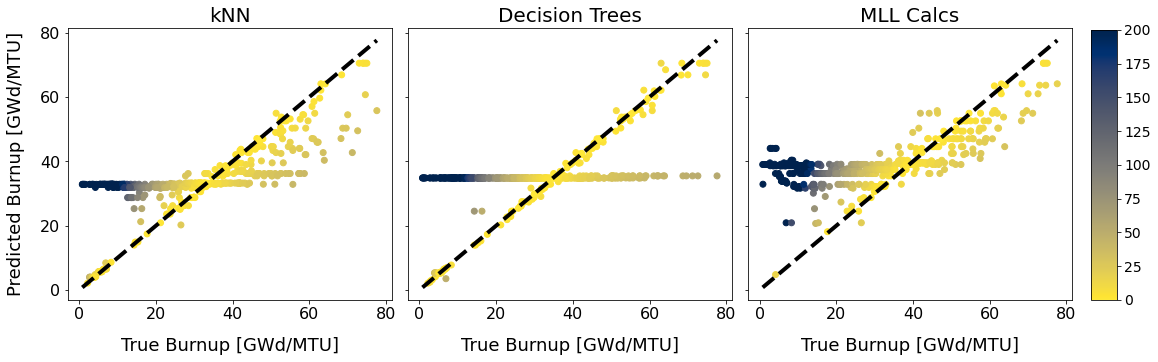

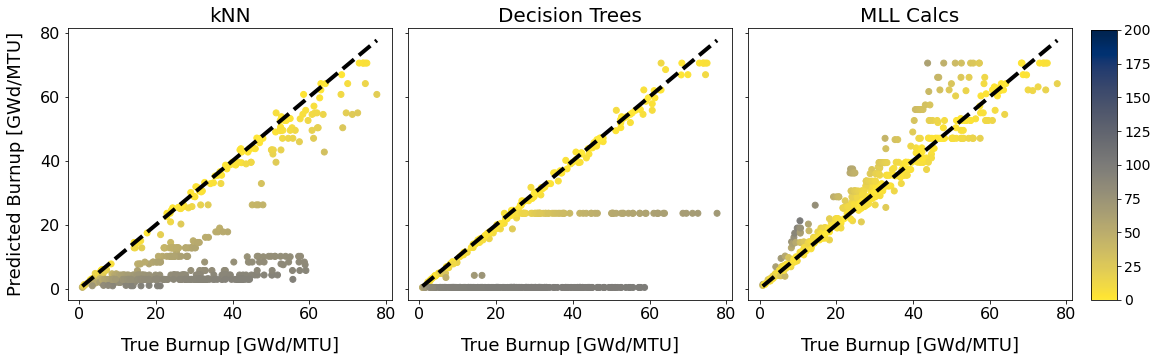

In [43]:
x = 'Burnup'
y = 'pred_Burnup'
err = 'Burnup_Error'

dflist = [knn_inull, dtr_inull, mll_inull]
fig, _, sv_fig = plotme(dflist, x, y, err, 'impnull')
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

dflist = [knn_znull, dtr_znull, mll_znull]
fig, _, sv_fig = plotme(dflist, x, y, err, '0null')
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

In [44]:
pred = 'enrichment'
csv_end = '_tset1.0_nuc29_impnull_ext_test_compare.csv'
knncsv = pred + '_knn' + csv_end
dtrcsv = pred + '_dtree' + csv_end
knn_inull = pd.read_csv(learn_path + knncsv).drop(columns='Unnamed: 0')
dtr_inull = pd.read_csv(learn_path + dtrcsv).drop(columns='Unnamed: 0')
csv_end = '_tset1.0_nuc29_0null_ext_test_compare.csv'
knncsv = pred + '_knn' + csv_end
dtrcsv = pred + '_dtree' + csv_end
knn_znull = pd.read_csv(learn_path + knncsv).drop(columns='Unnamed: 0')
dtr_znull = pd.read_csv(learn_path + dtrcsv).drop(columns='Unnamed: 0')

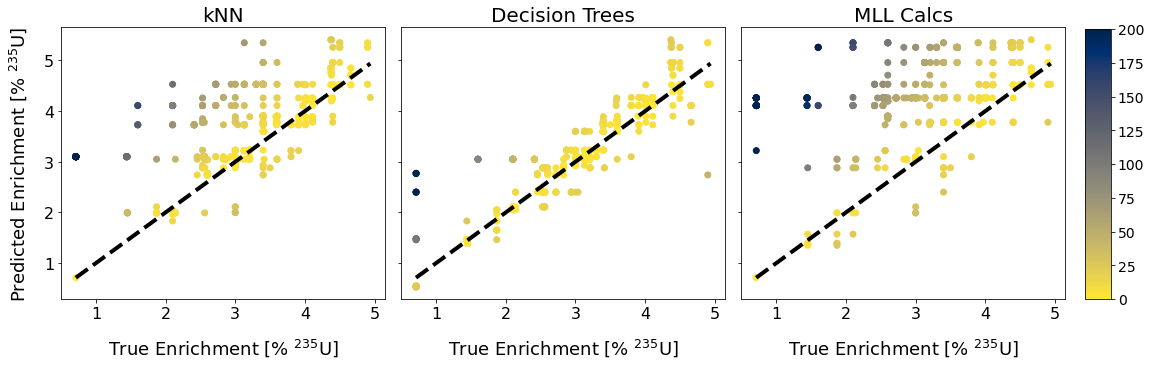

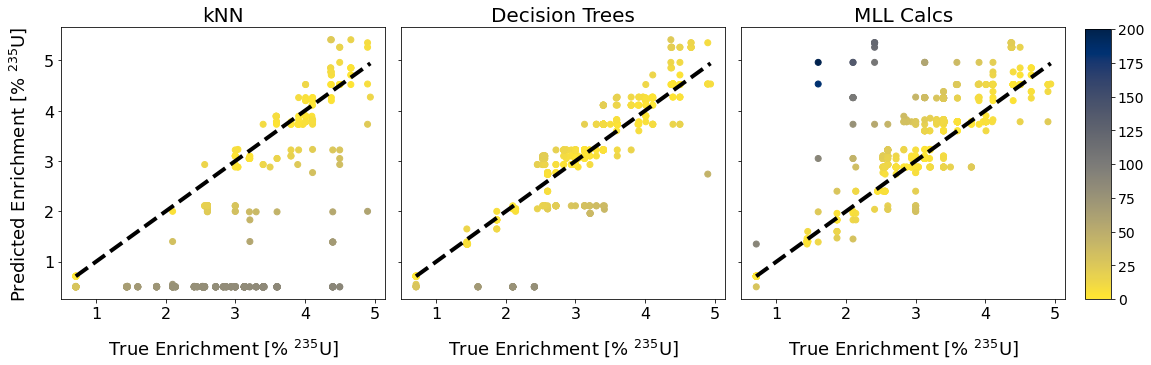

In [45]:
x = 'Enrichment'
y = 'pred_Enrichment'
err = 'Enrichment_Error'

dflist = [knn_inull, dtr_inull, mll_inull]
fig, _, sv_fig = plotme(dflist, x, y, err, 'impnull')
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

dflist = [knn_znull, dtr_znull, mll_znull]
fig, _, sv_fig = plotme(dflist, x, y, err, '0null')
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

# Trainset Testing

In [5]:
job = 'Job2_unc0.0'
#mll_auto = pd.read_csv(mll_gam + 'd1_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
job = 'Job0_unc0.01'
mll_nuc = mll_auto = pd.read_csv(mll_nuc + 'nuc29/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [8]:
#knncsv = 'burnup_knn_tset1.0_d1_hpge_predictions.csv'
#dtrcsv = 'burnup_dtree_tset1.0_d1_hpge_predictions.csv'
#knn_auto = pd.read_csv(learn_gam + 'auto/' + knncsv).drop(columns='Unnamed: 0')
#dtr_auto = pd.read_csv(learn_gam + 'auto/' + dtrcsv).drop(columns='Unnamed: 0')
knncsv = 'burnup_knn_tset1.0_nuc29_predictions.csv'
dtrcsv = 'burnup_dtree_tset1.0_nuc29_predictions.csv'
knn_nuc = pd.read_csv(learn_nuc + 'nuc29/' + knncsv).drop(columns='Unnamed: 0')
dtr_nuc = pd.read_csv(learn_nuc + 'nuc29/' + dtrcsv).drop(columns='Unnamed: 0')

In [7]:
dtr_auto.head(2)

,TrueY,DTree,AbsError
0,1051.45,1051.45,6.139089e-12
1,1051.45,1051.45,1.591616e-12


In [17]:
d1mll_auto.head(2)

,sim_idx,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,AvgPowerDensity,ModDensity,UiWeight,pred_idx,...,CDF_LLUnc_0.5,CDF_LogLL_0.1,CDF_LLUnc_0.1,CDF_LogLL_0.01,CDF_LLUnc_0.01,ReactorType_Score,CoolingTime_Error,Enrichment_Error,Burnup_Error,OrigenReactor_Score
0,41,bwr,4125.391152,0.54,1055.5,ge7x7-0,10.0,0.1,1,42,...,8920.066273,-1.530740e+08,2979.043051,-2.768641e+08,396.543266,True,57.543911,0.0,0.0,True
1,29,bwr,2629.718577,0.54,1055.5,ge7x7-0,10.0,0.1,1,3332,...,8898.437285,-1.526201e+08,2995.160799,-2.764184e+08,592.168121,True,83.656156,0.0,0.0,True


## Plot True Y vs Pred Y

In [12]:
algs = ['kNN', 'DTree', 'MLL']
en_lists = ['Auto', 'Short', 'Long']
def plotme(df_list, xcol, ycol, errcol, a):
    n = len(df_list)
    fig, axs = plt.subplots(nrows=1, ncols=n, sharex=True, sharey=True, figsize=(6*n,5))
    for i, (ax, df) in enumerate(zip(axs, df_list)):
        if i == 2:
            x = df[xcol]
            y = df[ycol]
            err = df[errcol]
        else:
            x = df['TrueY']
            y = df[algs[i]]
            err = df['AbsError']
        ax.scatter(x, y, c=err, cmap='BuGn')#cmap='viridis_r')
        ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
        ax.set_title(xcol + ' Prediction, Nuclide Mass Training Set', fontsize=14)
        #ax.set_title(algs[i] + ', ' + en_lists[a]+' Energy Window List', fontsize=14)
        ax.set_xlabel('TrueY', fontsize=16)
    axs[0].set_ylabel('PredictedY', fontsize=16)
    #fig.suptitle(algs[i] + 'Burnup Predictions', fontsize=16)
    #plt.savefig('./plots/true_v_pred.png', bbox_inches='tight', transparent=True)
    plt.show()
    

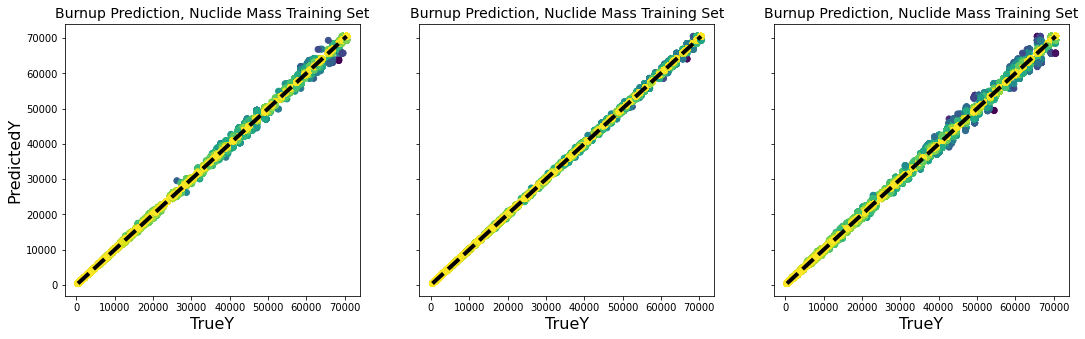

In [13]:
x = 'Burnup'
y = 'pred_Burnup'
err = 'Burnup_Error'
dflist = [knn_nuc, dtr_nuc, mll_nuc]
plotme(dflist, x, y, err, 0)

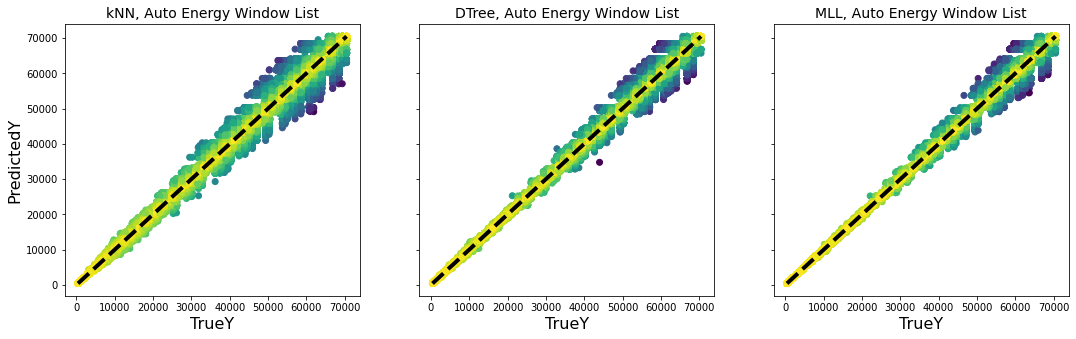

In [8]:
x = 'Burnup'
y = 'pred_Burnup'
err = 'Burnup_Error'
dflist = [knn_auto, dtr_auto, mll_auto]
plotme(dflist, x, y, err, 0)

## Plot Rel Err vs True Y

In [9]:
def rel_err(y_true,y_pred):
    rel_err = np.abs((y_true - y_pred)/y_true)*100
    return rel_err

In [13]:
def plot_re(df_list, xcol, ycol, errcol, a):
    n = len(df_list)
    fig, axs = plt.subplots(nrows=1, ncols=n, sharex=True, sharey=True, figsize=(6*n,5))
    for i, (ax, df) in enumerate(zip(axs, df_list)):
        if i == 2:
            x = df[xcol]
            y = df[ycol]
            err = df[errcol]
        else:
            x = df['TrueY']
            y = df[algs[i]]
            err = df['AbsError']
        rerr = rel_err(x, y)
        ax.scatter(x, rerr, c=err, cmap='viridis_r')
        ax.set_title(algs[i] + ', ' + en_lists[a]+' Energy Window List', fontsize=14)
        ax.set_xlabel('TrueY', fontsize=16)
    axs[0].set_ylabel('MAPE', fontsize=16)
    plt.show()

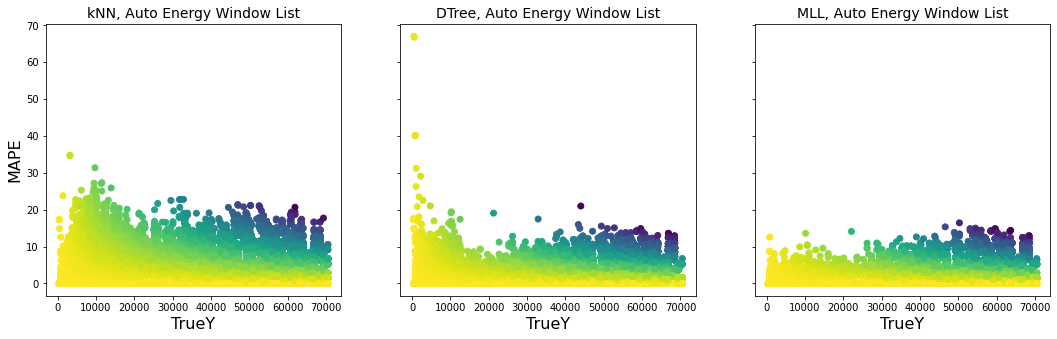

In [14]:
x = 'Burnup'
y = 'pred_Burnup'
err = 'Burnup_Error'
dflist = [knn_auto, dtr_auto, mll_auto]
plot_re(dflist, x, y, err, 0)

## Plotting LL

In [9]:
d1mll_auto.columns

Index(['sim_idx', 'ReactorType', 'CoolingTime', 'Enrichment', 'Burnup',
       'OrigenReactor', 'AvgPowerDensity', 'ModDensity', 'UiWeight',
       'pred_idx', 'pred_ReactorType', 'pred_CoolingTime', 'pred_Enrichment',
       'pred_Burnup', 'pred_OrigenReactor', 'pred_AvgPowerDensity',
       'pred_ModDensity', 'pred_UiWeight', 'MaxLogLL', 'MaxLLUnc',
       '2ndMaxLogLL', '2ndMaxLLUnc', 'CDF_LogLL_0.9998', 'CDF_LLUnc_0.9998',
       'CDF_LogLL_0.9988', 'CDF_LLUnc_0.9988', 'CDF_LogLL_0.95',
       'CDF_LLUnc_0.95', 'CDF_LogLL_0.9', 'CDF_LLUnc_0.9', 'CDF_LogLL_0.5',
       'CDF_LLUnc_0.5', 'CDF_LogLL_0.1', 'CDF_LLUnc_0.1', 'CDF_LogLL_0.01',
       'CDF_LLUnc_0.01', 'ReactorType_Score', 'CoolingTime_Error',
       'Enrichment_Error', 'Burnup_Error', 'OrigenReactor_Score'],
      dtype='object')

In [7]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

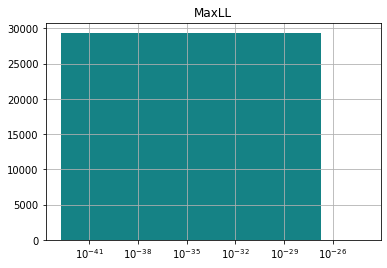

In [24]:
d1mll_auto['MaxLL'] = np.exp(d1mll_auto['MaxLogLL'])
fig, ax = plt.subplots()
d1mll_auto.hist(column='MaxLL', bins=500, color=colors['MTeal'], ax=ax, range=(0,1e-24), figsize=(5,5)) 
ax.set_xscale('log')
#plt.xlabel('Absolute Burnup Error [MWd/MTU]', fontsize=14)
#plt.title('kNN, Auto Energy Windows, Lab HPGe', fontsize=16)
plt.show()
#plt.savefig('./plots/abs_err_hist.png', bbox_inches='tight', transparent=True)

In [12]:
d1mll_auto['MaxLogLL'].describe()

count    2.937300e+04
mean    -4.261418e+03
std      1.135742e+05
min     -1.939928e+07
25%     -3.863747e+03
50%     -1.517208e+03
75%     -7.573681e+02
max     -4.797090e+01
Name: MaxLogLL, dtype: float64